## Data Exploration

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
print 'Dimension of training data: {}'.format(train.shape)
print 'Dimension of testing data: {}'.format(test.shape)

Dimension of training data: (199523, 41)
Dimension of testing data: (99762, 41)


In [6]:
# Check 5 samples of train
train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [7]:
# Check 5 samples of test
test.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000


Let's check unique values of target variable in both train and test data.

In [11]:
# Check target variable
print "Train: {}".format(train.income_level.unique())
print "Test: {}".format(test.income_level.unique())

Train: [-50000  50000]
Test: ['-50000' ' 50000+.']


Because target variable only has two unique values, it's a binary classificaton problem

In [4]:
# Check severity of imbalanced class
train['income_encode'] = np.where(train.income_level == -50000, 0, 1)
test['income_encode'] = np.where(test.income_level == "-50000", 0, 1)
print "Distribution of train: \n{}".format(train.income_encode.value_counts().to_string())
print "Distribution of test: \n{}".format(test.income_encode.value_counts().to_string())

Distribution of train: 
0    187141
1     12382
Distribution of test: 
0    93576
1     6186


Now we could seperate data categorical and numerical features, it will help us in further analysis.

In [5]:
cat_list = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,39,40,41]
num_list = [0,5,16,17,18,29,38]
# Subset of categorical variables
cat_train = train[cat_list]
cat_test = test[cat_list]
# Subset of numerical variables
num_train = train[num_list]
num_test = test[num_list]

del(train)
del(test)

We can see that people whose age is larger than 20 would have income level 1.

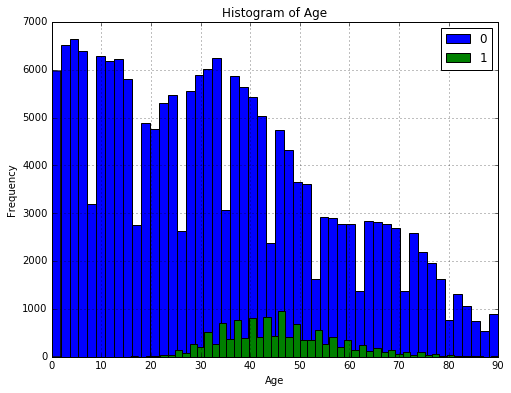

In [21]:
plt.hist(num_train[cat_train.income_encode == 0].age,bins=50,label="0")
plt.hist(num_train[cat_train.income_encode == 1].age,bins=50,label="1")
plt.legend()
plt.grid()
plt.title("Histogram of Age")
plt.xlabel('Age')
plt.ylabel('Frequency')

In skewed distribution, normalizing is always an option.

Top 5 common values of capital losses: 
0       195617
1902       407
1977       381
1887       364
1602       193
Bottom 5 common values of capital losses: 
974     2
155     1
2080    1
2519    1
1911    1


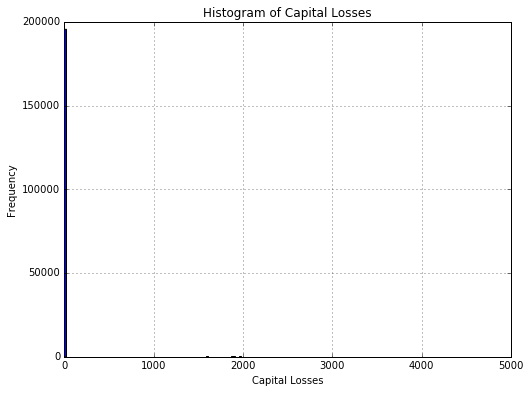

In [91]:
print "Top 5 common values of capital losses: \n{}".format(num_train.capital_losses.value_counts().head().to_string())
print "Bottom 5 common values of capital losses: \n{}".format(num_train.capital_losses.value_counts().tail().to_string())
num_train.capital_losses.hist(bins=200)
plt.title("Histogram of Capital Losses")
plt.xlabel('Capital Losses')
plt.ylabel('Frequency')

We can see that people whose wage/hr is smaller than 4000 would have income level 1.

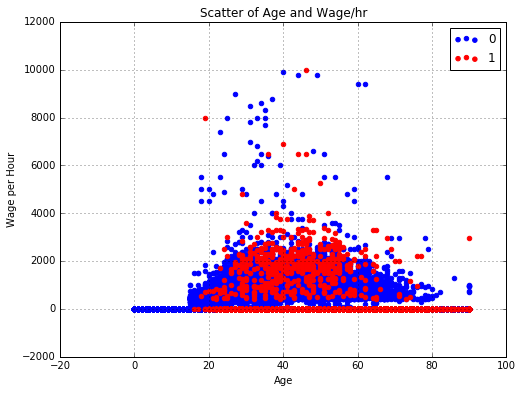

In [20]:
plt.scatter(num_train[cat_train.income_encode == 0].age, num_train[cat_train.income_encode == 0].wage_per_hour, 
            color="blue",label="0")
plt.scatter(num_train[cat_train.income_encode == 1].age, num_train[cat_train.income_encode == 1].wage_per_hour, 
            color="red",label="1")
plt.legend()
plt.grid()
plt.title("Scatter of Age and Wage/hr")
plt.xlabel('Age')
plt.ylabel('Wage per Hour')

We can see that people whose captial losses is smaller than 3000 would have income level 1.

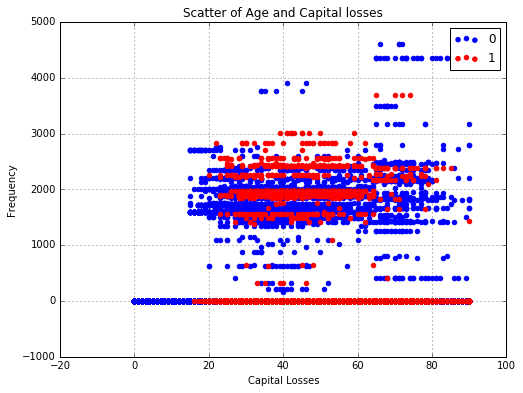

In [14]:
plt.scatter(num_train[cat_train.income_encode == 0].age, num_train[cat_train.income_encode == 0].capital_losses, 
            color="blue",label="0")
plt.scatter(num_train[cat_train.income_encode == 1].age, num_train[cat_train.income_encode == 1].capital_losses, 
            color="red",label="1")
plt.legend()
plt.grid()
plt.title("Scatter of Age and Capital losses")
plt.xlabel('Age')
plt.ylabel('Capital Losses')

In both income level, most people have private class of work.

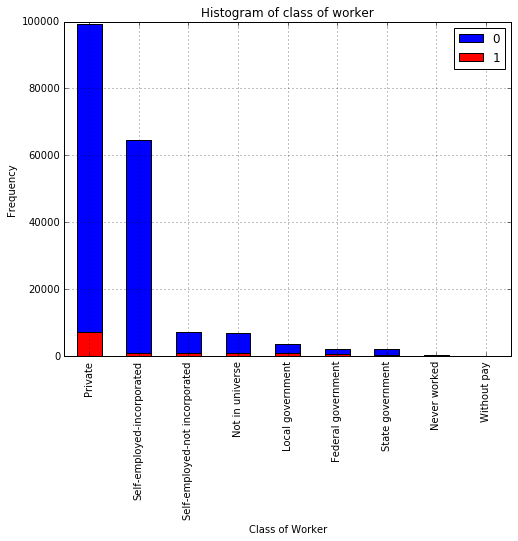

In [16]:
cat_train[cat_train.income_encode == 0].class_of_worker.value_counts().plot(kind='bar', label="0", color="blue")
cat_train[cat_train.income_encode == 1].class_of_worker.value_counts().plot(kind='bar', label="1", color="red")
plt.legend()
plt.grid()
plt.title("Histogram of class of worker")
plt.xlabel('Class of Worker')
plt.ylabel('Frequency')

All children have income level 0, and Bachelors degree holders have the largest propotion of people have income level 1.

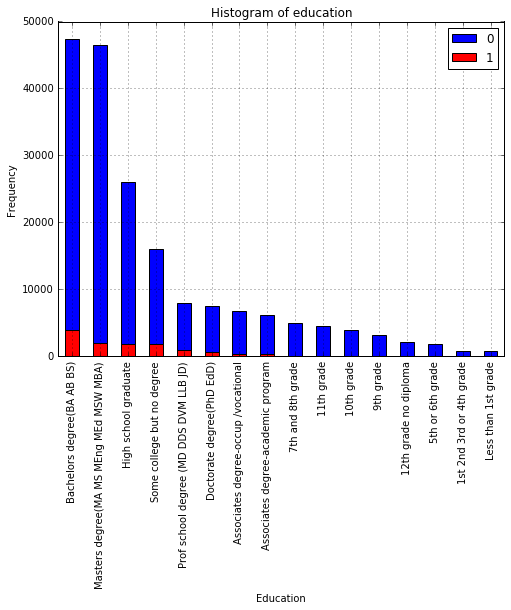

In [17]:
cat_train[cat_train.income_encode == 0].education.value_counts().plot(kind='bar', label="0", color="blue")
cat_train[cat_train.income_encode == 1].education.value_counts().plot(kind='bar', label="1", color="red")
plt.legend()
plt.grid()
plt.title("Histogram of education")
plt.xlabel('Education')
plt.ylabel('Frequency')

## Data Cleaning

Check if there is missing value in train and test data

In [26]:
print "Number of missing values in train data: {}".format(num_train[num_train.isnull().any(1)].shape[0])
print "Number of missing values in test data: {}".format(num_test[num_test.isnull().any(1)].shape[0])

Number of missing values in train data: 0
Number of missing values in test data: 0


In [27]:
num_train.corr()

,age,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,weeks_worked_in_year
age,1.000000,0.036938,0.053590,0.063351,0.104976,0.140887,0.206181
wage_per_hour,0.036938,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.195687
capital_gains,0.053590,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.083549
capital_losses,0.063351,0.010993,-0.012700,1.000000,0.042427,0.084255,0.100762
dividend_from_Stocks,0.104976,-0.005731,0.131476,0.042427,1.000000,0.007206,0.013823
num_person_Worked_employer,0.140887,0.191543,0.058015,0.084255,0.007206,1.000000,0.747302
weeks_worked_in_year,0.206181,0.195687,0.083549,0.100762,0.013823,0.747302,1.000000


In [28]:
num_test.corr()

,age,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,weeks_worked_in_year
age,1.000000,0.032432,0.051575,0.060118,0.109296,0.131897,0.196325
wage_per_hour,0.032432,1.000000,0.008497,0.016949,-0.009860,0.188827,0.194879
capital_gains,0.051575,0.008497,1.000000,-0.012476,0.110983,0.062618,0.085069
capital_losses,0.060118,0.016949,-0.012476,1.000000,0.042788,0.080337,0.098465
dividend_from_Stocks,0.109296,-0.009860,0.110983,0.042788,1.000000,0.005614,0.013862
num_person_Worked_employer,0.131897,0.188827,0.062618,0.080337,0.005614,1.000000,0.746980
weeks_worked_in_year,0.196325,0.194879,0.085069,0.098465,0.013862,0.746980,1.000000
